In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
DATA_PATH = './data/'
ANNO_FINE_PATH = DATA_PATH + 'anno_fine'
IMG = DATA_PATH + 'img'

ATTR_CLOTH_LIST_FILE = ANNO_FINE_PATH + '/list_attr_cloth.txt'
ATTR_IMG_LIST_FILE = ANNO_FINE_PATH + '/list_attr_img.txt'
ATTR_TYPES = {'1':"Estampado",'2':"Tipo de manga",'3':"Forma",'4':"Tipo de cuello",'5':"Tejido",'6':"Tallaje"}



In [3]:
# Lectura de la lista de atributos
def read_attr_cloth_list():
    column_to_attr_name = {}
    attr_type_to_columns = {}
    
    with open(ATTR_CLOTH_LIST_FILE) as fp: 
        fp.readline() # Ingorar numero de etiquetas
        fp.readline() # Ignorar cabecera
        column = 0
        for line in fp: 
            fields = line.split()
            attr = fields[0]
            attr_type = fields[1]
            column_to_attr_name[column] = attr
            if attr_type in attr_type_to_columns:
                attr_type_to_columns[attr_type].append(column)
            else:
                attr_type_to_columns[attr_type] = [column]
            column += 1
    return column_to_attr_name, attr_type_to_columns

# Lectura de atributos asociados a una imagen
def read_attr_img_list():
    attr_dict = []
    with open(ATTR_IMG_LIST_FILE) as fp: 
        fp.readline() # Ingorar numero de lineas
        fp.readline() # Ignorar cabecera
        for line in fp:
            row = [int(i) for i in line.split()[1:]]
            attr_dict.append(row)
    return pd.DataFrame.from_records(attr_dict)


In [4]:
column_to_attr_name, attr_type_to_columns = read_attr_cloth_list()           
attr_img_list = read_attr_img_list()    

In [5]:
# Análisis del número mínimo y máximo de atributos que puede tener una imagen
num_attr_per_img = (attr_img_list == 1).astype(int).sum(axis=1)
print(min(num_attr_per_img))
print(max(num_attr_per_img))

6
6


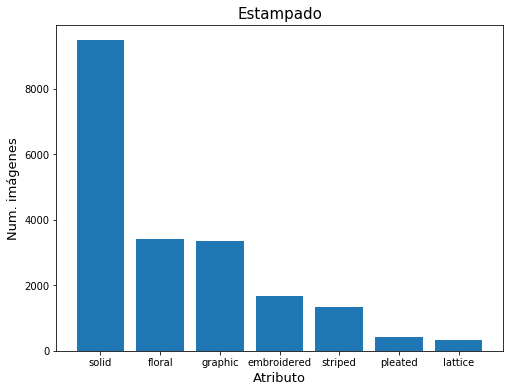

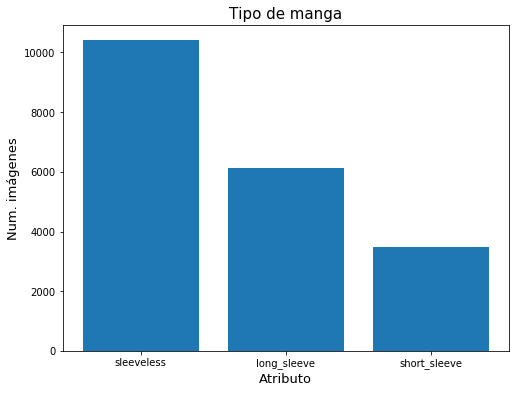

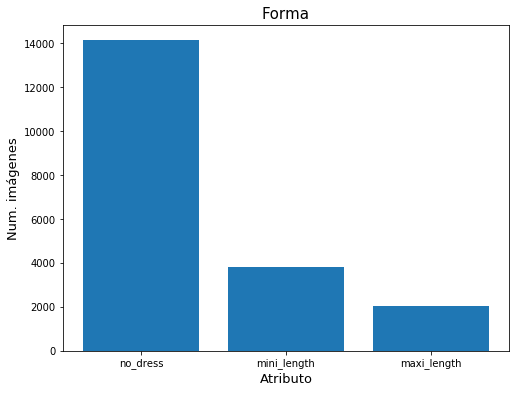

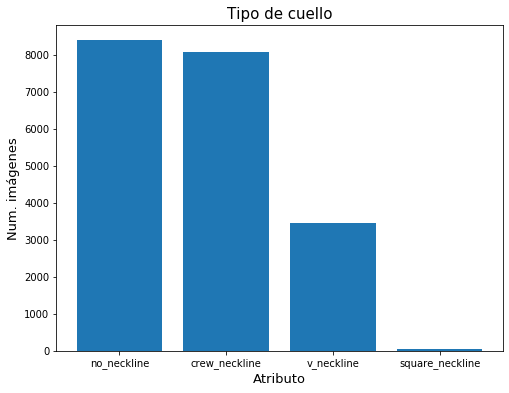

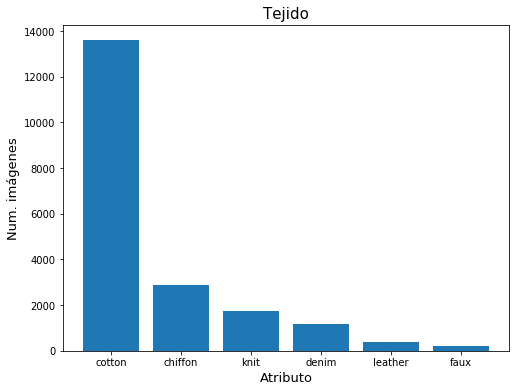

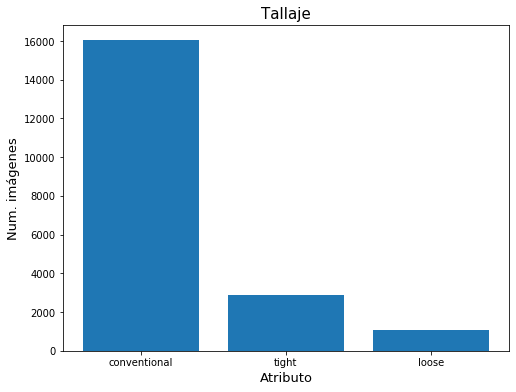

In [6]:
# Análisis de frecuencias dentro de cada tipo de atributo
num_occ_per_attr = (attr_img_list == 1).astype(int).sum(axis=0)
num_occ_per_attr.loc[1]
count = 1
figs = []
for attr_type, columns in attr_type_to_columns.items():
    labels = [column_to_attr_name[c] for c in columns]
    counts = [num_occ_per_attr.loc[c] for c in columns]
    
    df = pd.DataFrame(counts, index=labels, columns=["count"])
    df = df.sort_values(by=['count'], ascending=False)
    
    plt.figure(figsize=(8,6))
    plt.title(ATTR_TYPES[attr_type], fontsize=15)
    plt.xlabel("Atributo", fontsize=13)
    plt.ylabel("Num. imágenes", fontsize=13)
    plt.bar(df.index.values,df['count'])
    plt.show()    

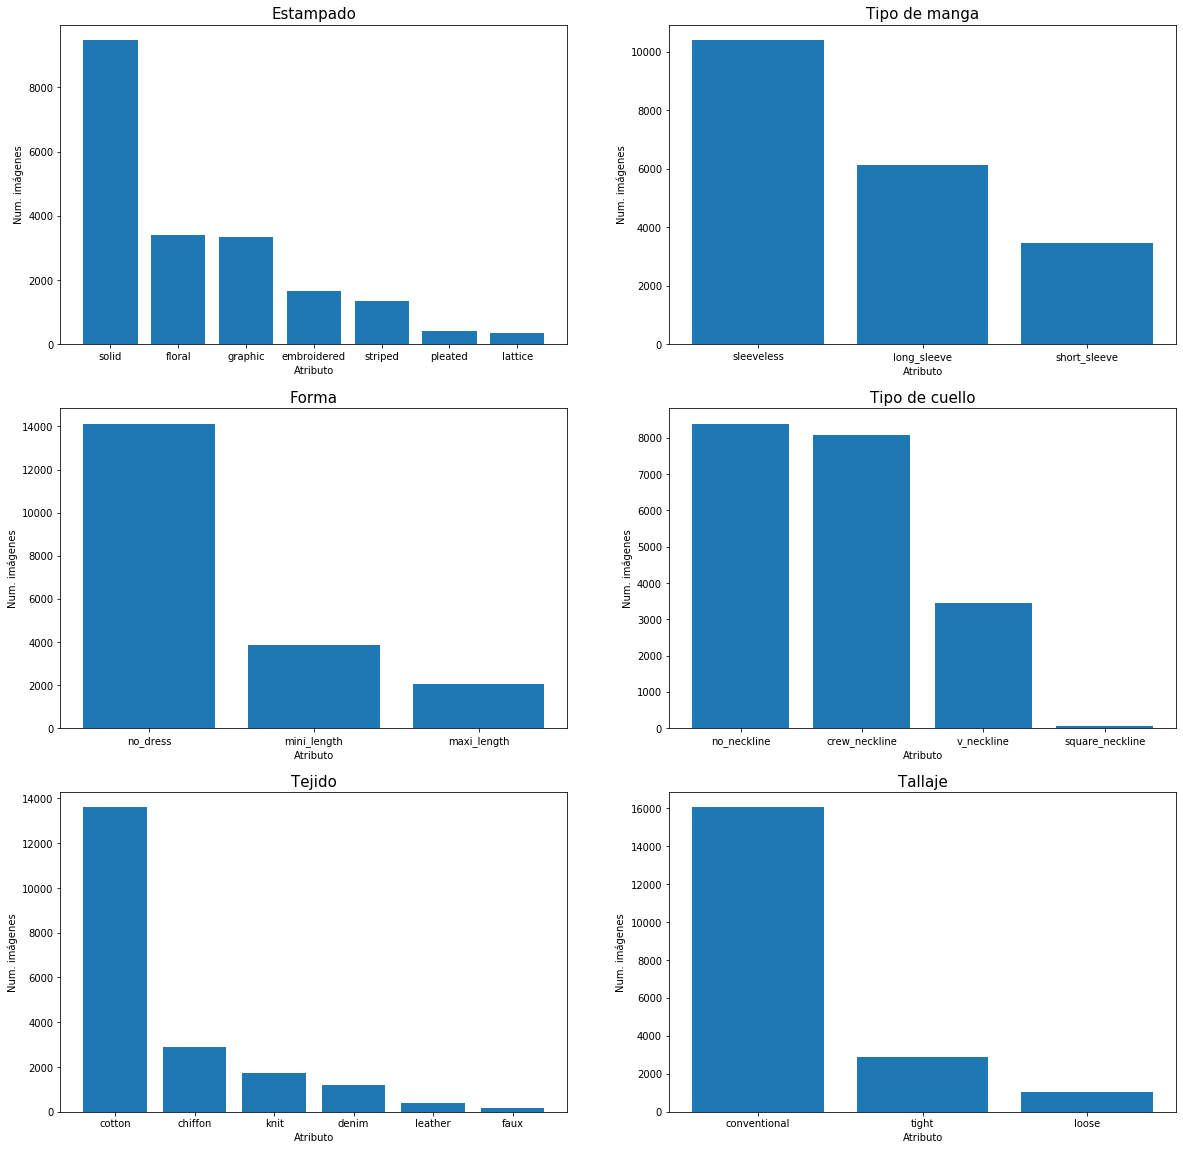

In [7]:
# Análisis de frecuencias dentro de cada tipo de atributo
num_occ_per_attr = (attr_img_list == 1).astype(int).sum(axis=0)
num_occ_per_attr.loc[1]
count = 0
figs = []
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

for attr_type, columns in attr_type_to_columns.items():
    labels = [column_to_attr_name[c] for c in columns]
    counts = [num_occ_per_attr.loc[c] for c in columns]
    
    r = count // 2
    c = count % 2
    
    df = pd.DataFrame(counts, index=labels, columns=["count"])
    df = df.sort_values(by=['count'], ascending=False)
    
    axs[r, c].set_title(ATTR_TYPES[attr_type], fontsize=15)
    axs[r, c].set(xlabel='Atributo', ylabel='Num. imágenes')
    axs[r, c].bar(df.index.values,df['count'])
    count += 1
#plt.show()    
plt.savefig('foo.png')